# TP5 Complementario

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
import statsmodels as sm
from statsmodels.api import OLS
from sklearn.svm import SVC

In [3]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_excel("bucaramangadltos.xlsx")
df.head(),

(   ORDEN                 ARMAS_MEDIOS          BARRIOS_HECHO   LATITUD  \
 0  50946  ARMA BLANCA / CORTOPUNZANTE                KENNEDY  7.153943   
 1  50947  ARMA BLANCA / CORTOPUNZANTE     CABECERA DEL LLANO  7.116619   
 2  50948  ARMA BLANCA / CORTOPUNZANTE            VILLA MARIA  7.154916   
 3  50949  ARMA BLANCA / CORTOPUNZANTE  VILLAS DE SAN IGNACIO  7.156274   
 4  50950  ARMA BLANCA / CORTOPUNZANTE                 GAITAN  7.130512   
 
     LONGITUD    ZONA              NOM_COMUNA   ANO    MES  DIA  DIA_SEMANA  \
 0 -73.136794  URBANA               01. Norte  2015  Enero    1  04. Jueves   
 1 -73.109865  URBANA  12. Cabecera del Llano  2015  Enero    1  04. Jueves   
 2 -73.130231  URBANA        02. Nor Oriental  2015  Enero    1  04. Jueves   
 3 -73.142024  URBANA               01. Norte  2015  Enero    1  04. Jueves   
 4 -73.131001  URBANA          04. Occidental  2015  Enero    1  04. Jueves   
 
                 DESCRIPCION_CONDUCTA             CONDUCTA  \
 0        

In [6]:
df['ANO'] = pd.to_datetime(df['ANO'], format='%Y')
df['ANO'] = df['ANO'].dt.year
#se convierte la columna ANO a datatime

In [7]:
df = df.rename(columns={"CLASIFICACIONES DELITO": "CLASIFICACIONES_DELITO"})

In [8]:
df = df.rename(columns={"ANO": "ANIO"})

In [9]:
df=df.drop(columns=["LATITUD","LONGITUD","ORDEN"]) #Se eliminan estas columnas ya que no aportarán datos

In [10]:
df.head()

,ARMAS_MEDIOS,BARRIOS_HECHO,ZONA,NOM_COMUNA,ANIO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES_DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,ARMA BLANCA / CORTOPUNZANTE,KENNEDY,URBANA,01. Norte,2015,Enero,1,04. Jueves,ARTÍCULO 103. HOMICIDIO,HOMICIDIO,Lesiones fatales,28,04. Jovenes,UNION LIBRE,MASCULINO,A PIE,A PIE
1,ARMA BLANCA / CORTOPUNZANTE,CABECERA DEL LLANO,URBANA,12. Cabecera del Llano,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,40,05. Adultez,SOLTERO,MASCULINO,A PIE,A PIE
2,ARMA BLANCA / CORTOPUNZANTE,VILLA MARIA,URBANA,02. Nor Oriental,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,18,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
3,ARMA BLANCA / CORTOPUNZANTE,VILLAS DE SAN IGNACIO,URBANA,01. Norte,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,37,05. Adultez,UNION LIBRE,FEMENINO,A PIE,A PIE
4,ARMA BLANCA / CORTOPUNZANTE,GAITAN,URBANA,04. Occidental,2015,Enero,1,04. Jueves,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,18,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE


In [11]:
df2 = df.copy()

In [12]:
label_encoder = LabelEncoder()

In [13]:
df2['ARMAS_MEDIOS'] = label_encoder.fit_transform(df2['ARMAS_MEDIOS'])
df2['BARRIOS_HECHO'] = label_encoder.fit_transform(df2['BARRIOS_HECHO'])
df2['ZONA'] = label_encoder.fit_transform(df2['ZONA'])
df2['NOM_COMUNA'] = label_encoder.fit_transform(df2['NOM_COMUNA'])
df2['BARRIOS_HECHO'] = label_encoder.fit_transform(df2['BARRIOS_HECHO'])
df2['MES'] = label_encoder.fit_transform(df2['MES'])
df2['DIA_SEMANA'] = label_encoder.fit_transform(df2['DIA_SEMANA'])
df2['DESCRIPCION_CONDUCTA'] = label_encoder.fit_transform(df2['DESCRIPCION_CONDUCTA'])
df2['CONDUCTA'] = label_encoder.fit_transform(df2['CONDUCTA'])
df2['NOM_COMUNA'] = label_encoder.fit_transform(df2['NOM_COMUNA'])
df2['CLASIFICACIONES_DELITO'] = label_encoder.fit_transform(df2['CLASIFICACIONES_DELITO'])
df2['CURSO_DE_VIDA'] = label_encoder.fit_transform(df2['CURSO_DE_VIDA'])
df2['ESTADO_CIVIL_PERSONA'] = label_encoder.fit_transform(df2['ESTADO_CIVIL_PERSONA'])
df2['GENERO'] = label_encoder.fit_transform(df2['GENERO'])
df2['MOVIL_AGRESOR'] = label_encoder.fit_transform(df2['MOVIL_AGRESOR'])
df2['MOVIL_VICTIMA'] = label_encoder.fit_transform(df2['MOVIL_VICTIMA'])

### Se realiza un TOP 5 de variables con más correlación a la variable objetivo a predecir: CURSO_DE_VIDA

In [18]:
correlation_matrix = df2.corr()
correlation_matrix = df2.corr()
correlation_with_target = correlation_matrix['CURSO_DE_VIDA'].abs().sort_values(ascending=False)
positive_correlations = correlation_with_target[correlation_with_target > 0]
top_5_correlations = positive_correlations[1:6]
print(top_5_correlations)

EDAD                    0.817751
ESTADO_CIVIL_PERSONA    0.296010
CONDUCTA                0.141208
DESCRIPCION_CONDUCTA    0.138682
GENERO                  0.100626
Name: CURSO_DE_VIDA, dtype: float64


In [19]:
scaler = RobustScaler()

In [20]:
df2_scaled = scaler.fit_transform(df2)

In [21]:
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)

In [22]:
df3 = df2.copy()

In [23]:
X = df3[['EDAD',
 'ESTADO_CIVIL_PERSONA',
 'CONDUCTA',
 'DESCRIPCION_CONDUCTA',
 'GENERO']]         
y = df3['CURSO_DE_VIDA']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

## DecisionTreeClassifier

In [25]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       608
           3       1.00      1.00      1.00      4887
           4       1.00      1.00      1.00      8643
           5       1.00      1.00      1.00       900

    accuracy                           1.00     15220
   macro avg       1.00      1.00      1.00     15220
weighted avg       1.00      1.00      1.00     15220



### Se puede observar un precisión perfecta, por lo cual da a entender que los modelos se ajustan excesivamente a los datos de entrenamiento.  (Overfitting)

## Se aplican hiperparámetros para mitigar el overfitting

### DecisionTreeClassifier  con hiperparámetros

In [30]:
hyperparameters = {
    'criterion': 'gini',
    'max_depth': 1,
    'min_samples_split': 7,
    'min_samples_leaf': 5,
    'max_features': None}

classifier = DecisionTreeClassifier(**hyperparameters)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8889618922470434
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.00      0.00      0.00       108
           2       0.00      0.00      0.00       608
           3       0.86      1.00      0.93      4887
           4       0.91      1.00      0.95      8643
           5       0.00      0.00      0.00       900

    accuracy                           0.89     15220
   macro avg       0.29      0.33      0.31     15220
weighted avg       0.79      0.89      0.84     15220



E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Se puede observar un mejor rendimiento a la hora de aplicar hiperparámetros.

# Se utiliza otro df para ejemplificar casos de regresión.

## Regresión: casos dengue


Datos correspondientes al Registro del Sistema Nacional de Vigilancia de la Salud de Dengue y Zika
La información se obtuvo de:
http://datos.salud.gob.ar/dataset/vigilancia-de-dengue-y-zika/archivo/ab93dc4b-4e6c-499b-9335-c548a701a870

In [28]:
dfd=pd.read_excel("casos_dengue.xlsx")
dfd.head()

,ano,semana_epidemiologica,fecha_inicio_semana_epidemiologica,grupo_etario,departamento_residencia,n_notificaciones,n_confirmados_probables_fis,n_confirmados_por_laboratorio,n_internados_fecha_internacion,n_internados_uti_fecha_internacion,n_fallecidos_confirmados_por_laboratorio
0,2022,27,2022-07-03,"[40,50)",COMUNA 15,1,0,0,0,0,0
1,2022,28,2022-07-10,"[20,30)",COMUNA 5,1,0,0,0,0,0
2,2022,28,2022-07-10,"[40,50)",COMUNA 15,1,0,0,0,0,0
3,2022,28,2022-07-10,"[40,50)",COMUNA 7,1,0,0,0,0,0
4,2022,31,2022-07-31,"[30,40)",COMUNA 6,1,0,0,0,0,0


In [29]:
dfd.shape # posee 76099 filas y 20 columnas

(1962, 11)

In [29]:
dfd.columns

Index(['ano', 'semana_epidemiologica', 'fecha_inicio_semana_epidemiologica',
       'grupo_etario', 'departamento_residencia', 'n_notificaciones',
       'n_confirmados_probables_fis', 'n_confirmados_por_laboratorio',
       'n_internados_fecha_internacion', 'n_internados_uti_fecha_internacion',
       'n_fallecidos_confirmados_por_laboratorio'],
      dtype='object')

In [30]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   ano                                       1962 non-null   int64         
 1   semana_epidemiologica                     1962 non-null   int64         
 2   fecha_inicio_semana_epidemiologica        1962 non-null   datetime64[ns]
 3   grupo_etario                              1962 non-null   object        
 4   departamento_residencia                   1962 non-null   object        
 5   n_notificaciones                          1962 non-null   int64         
 6   n_confirmados_probables_fis               1962 non-null   int64         
 7   n_confirmados_por_laboratorio             1962 non-null   int64         
 8   n_internados_fecha_internacion            1962 non-null   int64         
 9   n_internados_uti_fecha_interna

In [31]:
dfd.describe

<bound method NDFrame.describe of        ano  semana_epidemiologica fecha_inicio_semana_epidemiologica  \
0     2022                     27                         2022-07-03   
1     2022                     28                         2022-07-10   
2     2022                     28                         2022-07-10   
3     2022                     28                         2022-07-10   
4     2022                     31                         2022-07-31   
...    ...                    ...                                ...   
1957  2023                     15                         2023-04-09   
1958  2023                     18                         2023-04-30   
1959  2023                     20                         2023-05-14   
1960  2023                      8                         2023-02-19   
1961  2023                     11                         2023-03-12   

     grupo_etario departamento_residencia  n_notificaciones  \
0         [40,50)               COMUNA

In [32]:
dfd.isnull()

,ano,semana_epidemiologica,fecha_inicio_semana_epidemiologica,grupo_etario,departamento_residencia,n_notificaciones,n_confirmados_probables_fis,n_confirmados_por_laboratorio,n_internados_fecha_internacion,n_internados_uti_fecha_internacion,n_fallecidos_confirmados_por_laboratorio
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1957,False,False,False,False,False,False,False,False,False,False,False
1958,False,False,False,False,False,False,False,False,False,False,False
1959,False,False,False,False,False,False,False,False,False,False,False
1960,False,False,False,False,False,False,False,False,False,False,False


In [33]:
dfdu=dfd.drop_duplicates()
print(dfdu.shape) # no se encuentran duplicados

(1962, 11)


In [34]:
dfd = dfd.drop (columns='fecha_inicio_semana_epidemiologica') # Eliminamos la fecha, dado que tenemos el número de semana en "semana_epidemiologica"

In [35]:
label_encoder = LabelEncoder()
for column in dfd.columns:
    if dfd[column].dtype == 'object':
        dfd[column] = label_encoder.fit_transform(dfd[column])

In [36]:
dfd.head (2)

,ano,semana_epidemiologica,grupo_etario,departamento_residencia,n_notificaciones,n_confirmados_probables_fis,n_confirmados_por_laboratorio,n_internados_fecha_internacion,n_internados_uti_fecha_internacion,n_fallecidos_confirmados_por_laboratorio
0,2022,27,6,6,1,0,0,0,0,0
1,2022,28,4,10,1,0,0,0,0,0


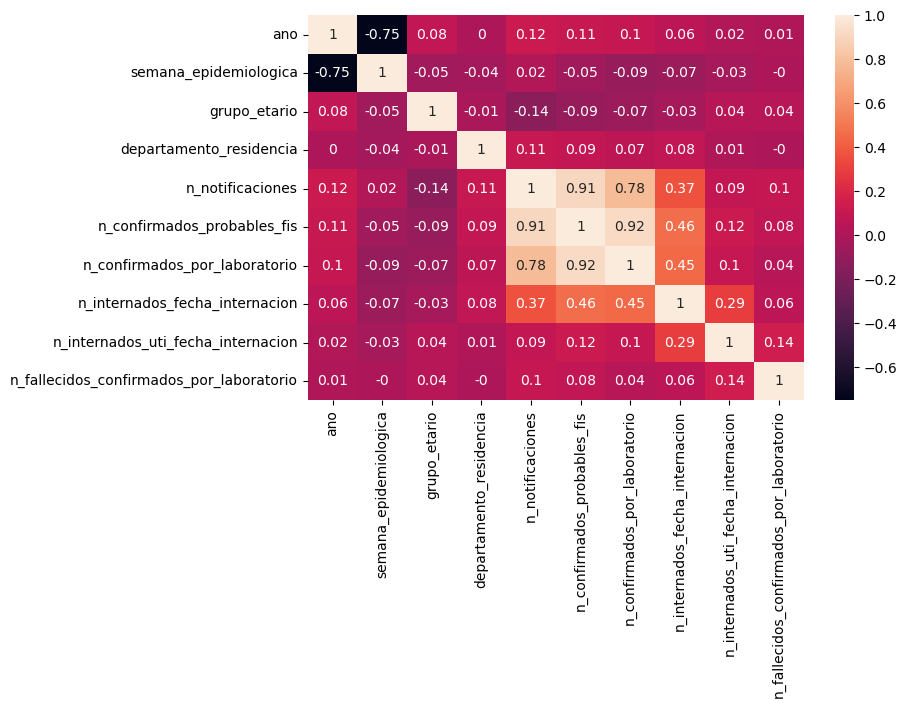

In [37]:
correlation_matrix = dfd.corr(numeric_only=True).round(2)
correlation_matrix

plt.figure(figsize=(8,5))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

## Se utiliza Backward Elimination para seleccionar variables que nos ayudarán a predecir la variable "n_confirmados_por_laboratorio"

In [38]:
X = dfd.drop("n_confirmados_por_laboratorio", 1)      
y = dfd['n_confirmados_por_laboratorio']           

C:\Users\Mariano\AppData\Local\Temp\ipykernel_6948\2020082801.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dfd.drop("n_confirmados_por_laboratorio", 1)


## Backward Elimination

In [47]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [48]:
import numpy as np
import statsmodels.api as sm

In [49]:
backward_elimination(X,y)

['ano',
 'semana_epidemiologica',
 'n_notificaciones',
 'n_confirmados_probables_fis',
 'n_internados_fecha_internacion',
 'n_fallecidos_confirmados_por_laboratorio']

In [50]:
X = dfd[['ano',
 'semana_epidemiologica',
 'n_notificaciones',
 'n_confirmados_probables_fis',
 'n_internados_fecha_internacion',
'n_fallecidos_confirmados_por_laboratorio']]         
y = dfd['n_confirmados_por_laboratorio']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Se utiliza Linear Regression con la variable "n_confirmados_por_laboratorio"

## Linear Regression

In [31]:
modellin = LinearRegression(fit_intercept=True)
modellin.fit(X, y)
y_pred = modellin.predict(X_test)
y_train_pred = modellin.predict(X_train)
y_test_pred = modellin.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))
modellin_train_mse = mean_squared_error(y_train, y_train_pred)
modellin_test_mse = mean_squared_error(y_test, y_test_pred)
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)
print(r2)

Error en datos de train: 0.17384072478415286
Error en datos de test: 0.17502211271351756
MAE 0.31675235282340525
RMSE 0.4183564421800118
0.6730359962591825


In [53]:
dfd =pd.DataFrame({'Actual (y)': y_test, 'Predicted (y_hat)': y_pred})
dfd

,Actual (y),Predicted (y_hat)
1096,1,1.682571
572,5,4.869440
450,3,2.040639
383,1,0.881205
1489,3,1.520349
...,...,...
1330,2,5.134884
567,22,16.174403
618,20,17.093723
1406,0,-0.932891


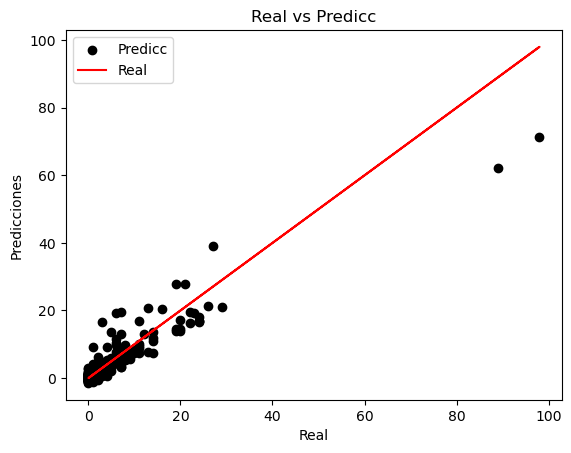

In [54]:
plt.scatter(y_test, y_pred, color='black', label='Predicc')
plt.plot(y_test, y_test, color='red', label='Real')
plt.xlabel('Real')
plt.ylabel('Predicciones')
plt.title('Real vs Predicc')
plt.legend()
plt.show()

### Se utiliza RandomForestRegressor con la variable "n_confirmados_por_laboratorio"

## RandomForestRegressor

In [55]:
modelrfr = RandomForestRegressor(n_estimators=100, random_state=42)
modelrfr.fit(X, y)
y_pred = modelrfr.predict(X_test)
y_train_pred = modelrfr.predict(X_train)
y_test_pred = modelrfr.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))
modelrfr_train_mse = mean_squared_error(y_train, y_train_pred)
modelrfr_test_mse = mean_squared_error(y_test, y_test_pred)
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)
print(r2)

Error en datos de train: 0.7089446791909713
Error en datos de test: 0.8048378285306684
MAE 0.4189735564566373
RMSE 0.8971275430676892
0.9880754614857485


In [56]:
dfd =pd.DataFrame({'Actual (y)': y_test, 'Predicted (y_hat)': y_pred})
dfd

,Actual (y),Predicted (y_hat)
1096,1,1.050000
572,5,5.224310
450,3,2.045095
383,1,1.000000
1489,3,3.190000
...,...,...
1330,2,3.401667
567,22,20.870000
618,20,20.970000
1406,0,0.000000


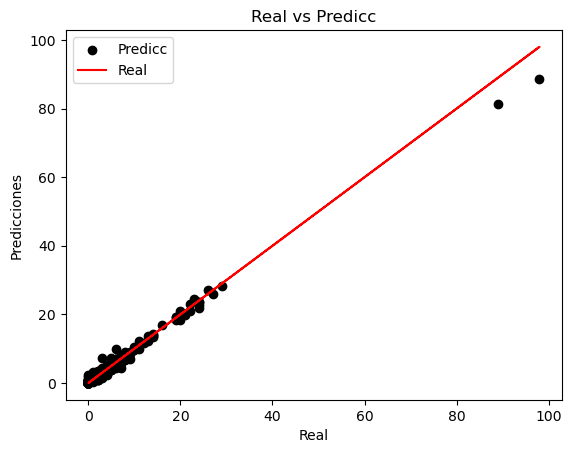

In [57]:
plt.scatter(y_test, y_pred, color='black', label='Predicc')
plt.plot(y_test, y_test, color='red', label='Real')
plt.xlabel('Real')
plt.ylabel('Predicciones')
plt.title('Real vs Predicc')
plt.legend()
plt.show()

### En el modelo de Regresión Lineal se puede observar que el error de datos train es menor que datos test, indica que podria haber sobreajuste.

### En el modelo de RandomForestRegressor, no hay sobreajuste ya que presenta valores muy bajos en los valores de train y test.